# Figure 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, rcParams

Build the model and calculate

In [2]:
#VARIABLES
Qcr= 231 + 23 #Carbonate regeneration kJ/molCO2
Qpsa=(14.5 + 36.4)/2 # Pressure swing absorption kJ/molCO2, the energy is in between 14.5-36.4 kJ/molCO2. 
Qar=179 # Amine regeneration considering heat integration in the capture, kJ/molCO2, the energy is at between 88 - 203 kJ/molCO2
Qcompression = (14+19)/2 #CO2 compression kJ/molCO2, the energy is in between 14.0 - 19.0 kJ/molCO2 

Xout=0.3 #CO2 loading the capture media after CO2 conversion or after amine regeneration, molCO2/molamine
Xin=0.5 #CO2 loading in the CO2-rich amine solution

x=0.5 #Assumed CO2 single-pass conversion rate of the gas-fed electrolyzer
xx=0.5 #Assumed CO2 single-pass conversion rate for the gas-fed elecrolyzer with no carbonate formation. 
#X=np.arange(0, 0.1, 0.1)
FE=0.9  #State-of-the-art gas-fed electrolyzer having a FE of CO at 90% at 100 mA cm-2

E=3 #Overall cell voltage for the gas-fed electrolyzer

X=[0.3, 0.3, 0.3] # CO2 loading of the amine effluent 
#from the integrated electrolyzers [optimal, baseline, pessimistic] scenarios

Ecomb=[3, 4, 5] # Overall cell voltages for the integrated electrolyzers

FEcomb=[0.9,.7, 0.4] #FE CO for the integrated electrolyzers.

# CONSTANTS
z=2 # number of charge transfered to produce one CO molecule
F=96485 # Faraday constant, sA/mol

#ENERGY COST EQUATION

#Sequential energy
Qsep=Qar+Qcr+Qcompression + np.dot(Qpsa, 2*(1/x-1))+E*z*F/1000/FE #baseline scenario with CO2 loss to bi-carbonates
Qsepnoc=Qar+Qcompression+np.dot(Qpsa,(1/xx-1))+E*z*F/1000/FE #optimal scenario with no CO2 loss to bi-carbonates

#Amine regeneration energy cost
Qaminer = Qar #amine regeneration, kJ/molCO2

#PSA energy cost for sequential route
Qpsasep=np.dot(Qpsa, 2*(1/x-1)) #PSA energy cost for the baseline sequential route 
Qpsasepnoc = np.dot(Qpsa,(1/xx-1)) #PSA energy cost for the optimal sequential route

#Electrolyzer energy cost
Qes = E*z*F/FE/1000

#Molar ratio of CO2 converted to CO using a separation&electrolysis process
r=np.divide(np.subtract(X,Xout),(Xin-Xout))
#Molar ratio of CO2 converted to CO in the integrated electrolyzer. 
rc=np.divide(np.subtract(Xin,X),(Xin-Xout))

#Energy cost of the integrated electrolyzer
Qec = rc*np.dot(Ecomb, z*F)/np.dot(FEcomb,1000)

#Qarcomb=np.dot(Qsep, r)
#Energy cost of each unit operation in the saration&electrolysis process in the integrated route
Qaminercomb=np.dot(Qaminer,r) #amine regeneration
Qpsacomb = np.dot(Qpsasep,r) #PSA product separation for baseline gas-fed electrolyzer
Qpsacombnoc=np.dot(Qpsasepnoc,r) #PSA product separation optimal gas-fed electrolyzer
Qcrcomb = np.dot(Qcr, r) #Carbonate regeneration 
Qescomb = np.dot(Qes, r) #Gas-fed electrolyzer

#Compare energy costs of [sequential route, sequential route with no carbonate formation, optimistic integrated route,
#baseline case, pessimistic case]
Qa=np.concatenate(([Qaminer, Qaminer], [0,0,0]), axis=None) #amine regeneration
Qcom = np.concatenate(([Qcompression, Qcompression], [0,0,0]), axis=None) #CO2 compression
Qp=np.concatenate(([Qpsasep, Qpsasepnoc], [0,0,0]), axis=None) #PSA product separation
Qc= np.concatenate(([Qcr,0], [0,0,0]), axis=None) #Carbonate regeneration
Qe= np.concatenate(([Qes, Qes], [0,0,0]), axis=None) #Gas-fed electrolysis
Qeec = np.concatenate(([0,0], Qec), axis=None) #Integrated electrolysis
Qcombreg=np.concatenate(([0,0],Qaminercomb+Qpsacomb+Qcrcomb+Qescomb), axis=None) #Total separation&electrolysis for the integrated route
Qcombregnoc = np.concatenate(([0,0],Qaminercomb+Qpsacombnoc+Qescomb+Qec), axis=None)#Total separation&electrolysis for the integrated route with no carbonate regeneration

[16.5 16.5  0.   0.   0. ]


Fig. 3a: The energy breakdown in a bar chart

[179 179   0   0   0]
[16.5 16.5  0.   0.   0. ]
[50.9  25.45  0.    0.    0.  ]
[254   0   0   0   0]
[643.23333333 643.23333333   0.           0.           0.        ]
[0. 0. 0. 0. 0.]
[   0.            0.          643.23333333 1102.68571429 2412.125     ]


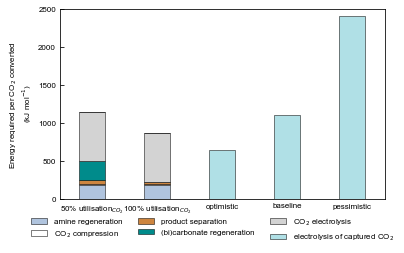

In [4]:
u=[1,2,3,4, 5] #set table x-axis index
w=0.4 #define bar width

plt.rcParams['font.family']='Arial' #set to Arial font
plt.rcParams['font.size']=8 #set fontsize as 8
fig=plt.gcf() 
fig.set_size_inches((2.33*2.5, 2.33*1.5)) #define a figure size
plt.tick_params(direction='in') #let all the ticks point inward

plt.bar(u,Qa,width=w, edgecolor='k',linewidth=0.5, facecolor='lightsteelblue', label='amine regeneration') #plot amine regeneration energy cost
plt.bar(u, Qcom, bottom = Qa, width=w, edgecolor='k',linewidth=0.5, facecolor='white', label='CO$_2$ compression') #plot CO2 compression
plt.bar(u,Qp, bottom=Qa + Qcom ,width=w, edgecolor='k',linewidth=0.5, facecolor='peru', label='product separation') #plot PSA product separation energy cost
plt.bar(u, Qc, bottom = Qa + Qcom + Qp, width=w, edgecolor='k',linewidth=0.5, facecolor='darkcyan', label='(bi)carbonate regeneration') #plot carbonate regeneration
plt.bar(u, Qe, bottom = Qa  + Qcom + Qp + Qc, width=w,edgecolor='k', linewidth=0.5, facecolor='lightgray', label='CO$_2$ electrolysis') #plot gas-fed electrolyzer energy cost
#plt.bar(u, Qcombreg, bottom=Qa+Qp+Qc+Qe, width=w,edgecolor='k', linewidth=0.5, facecolor='white', label='energy penalty to regenerate amine') #plot separation&electrolysis energy cost
plt.bar(u, Qeec, bottom = Qa  + Qcom + Qp + Qc + Qe +Qcombreg, width=w,edgecolor='k', linewidth=0.5, facecolor='powderblue', label ='electrolysis of captured CO$_2$') #plot integrated energy cost


plt.ylim(0,2500) #set y-axis limit
plt.xlim(0.5,5.5) #set x-axis limit

plt.xticks([1,2,3,4,5],['50% utilisation$_{CO_2}$','100% utilisation$_{CO_2}$', 'optimistic','baseline',  'pessimistic']) #convert x-axis index to text label
plt.tick_params(bottom=False) #remove x-axis ticks

plt.legend(frameon=False, ncol=3, bbox_to_anchor=(1.05, -0.05)) #add legends
plt.ylabel('Energy required per CO$_2$ converted \n (kJ mol$^{-1}$)') #add y-axis label

#print energy cost of each process
print(Qa)
print(Qcom)
print(Qp)
print(Qc)
print(Qe)
print(Qcombreg)
print(Qeec)

#Save the figure.
#fig.savefig('Figure/barchart total energy.eps', bbox_inches='tight', pad_inches=0, transparent=True)

Energy saved if the gas-fed electrolyser has 50% CO2 utilisation efficiency for optimistic and baseline integrated scenarios

In [5]:
Qsave=[Qsep-Qcombreg[2]-Qeec[2], Qsep-Qcombreg[3]-Qeec[3]]

In [6]:
Qsave/Qsep*100

array([43.75528287,  3.58048492])

Energy saved if the gas-fed electrolyser has no carbonate formation for optimistic and baseline integrated scenarios

In [7]:
Qsavewithnoc=[Qsepnoc-Qcombreg[2]-Qeec[2], Qsep-Qcombreg[3]-Qeec[3]]

In [8]:
Qsavewithnoc/Qsepnoc*100

array([25.56749147,  4.73830233])

Fig. 3b: Comparison of thermal and electricity energy in a bar chart

[ 733.63333333  685.18333333  643.23333333 1102.68571429 2412.125     ]
[410 179   0   0   0]


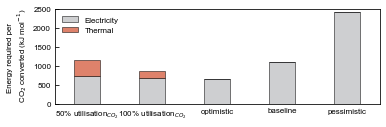

In [13]:
u=[1,2,3,4, 5] #set table x-axis index
w=0.4 #define bar width

plt.rcParams['font.family']='Arial' #set to Arial font
plt.rcParams['font.size']=8 #set fontsize as 8
fig=plt.gcf() 
fig.set_size_inches((2.33*2.5, 2.33*.75)) #define a figure size
plt.tick_params(direction='in') #let all the ticks point inward

Wpc = [23, 0, 0, 0, 0]
Qpc = [231, 0, 0, 0, 0]

plt.bar(u, Qcom + Qp + Qe + Qeec + Wpc, width=w, edgecolor='k',linewidth=0.5, facecolor='#cecfd1', label='Electricity') #plot CO2 compression
plt.bar(u,Qa + Qpc, bottom =  Qcom + Qp + Qe + Qeec + Wpc, width=w, edgecolor='k',linewidth=0.5, facecolor='#de826b', label='Thermal') #plot amine regeneration energy cost

plt.ylim(0,2500) #set y-axis limit
plt.xlim(0.5,5.5) #set x-axis limit

plt.xticks([1,2,3,4,5],['50% utilisation$_{CO_2}$','100% utilisation$_{CO_2}$', 'optimistic','baseline',  'pessimistic']) #convert x-axis index to text label
plt.tick_params(bottom=False) #remove x-axis ticks

plt.legend(frameon = False)
plt.ylabel('Energy required per \n CO$_2$ converted (kJ mol$^{-1}$)') #add y-axis label

#print energy cost of each process
print(Qcom + Qp + Qe + Qeec + Wpc)
print(Qa + Qpc)

#Save the figure.
#fig.savefig('Figure/barchart - thermal and electricity.eps', bbox_inches='tight', pad_inches=0, transparent=True)

Fig. 3c: the energy cost in a bar chart

[185.26094276 173.02609428 162.43265993 278.45598846 609.12247475]
[38.47824214 10.37289961  0.          0.          0.        ]


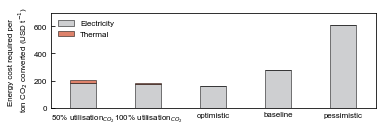

In [19]:
u=[1,2,3,4, 5] #set table x-axis index
w=0.4 #define bar width

plt.rcParams['font.family']='Arial' #set to Arial font
plt.rcParams['font.size']=8 #set fontsize as 8
fig=plt.gcf() 
fig.set_size_inches((2.33*2.5, 2.33*.75)) #define a figure size
plt.tick_params(direction='in') #let all the ticks point inward

Pheatusdbtu = 2.69 #https://www.indexmundi.com/commodities/?commodity=natural-gas&months=12 usd per million BTU
Pheatusdkj = Pheatusdbtu/1e6/1.055 #usd per kj
Pelectricity = 0.04/3600 #usd per kj

plt.bar(u, (Qcom + Qp + Qe + Qeec + Wpc)*Pelectricity/44*1e6, width=w, edgecolor='k',linewidth=0.5, facecolor='#cecfd1', label='Electricity') #plot CO2 compression
plt.bar(u,(Qa + Qpc)*Pheatusdkj/44*1e6, bottom =  (Qcom + Qp + Qe + Qeec)*Pelectricity/44*1e6, width=w, edgecolor='k',linewidth=0.5, facecolor='#de826b', label='Thermal') #plot amine regeneration energy cost

plt.ylim(0,700) #set y-axis limit
plt.xlim(0.5,5.5) #set x-axis limit

plt.xticks([1,2,3,4,5],['50% utilisation$_{CO_2}$','100% utilisation$_{CO_2}$', 'optimistic','baseline',  'pessimistic']) #convert x-axis index to text label
plt.tick_params(bottom=False) #remove x-axis ticks

plt.legend(frameon = False)
plt.ylabel('Energy cost required per \n ton CO$_2$ converted (USD t$^{-1}$)') #add y-axis label

#print energy cost of each process
print((Qcom + Qp + Qe + Qeec + Wpc)*Pelectricity/44*1e6)
print((Qa + Qc + Qpc)*Pheatusdkj/44*1e6)

#Save the figure.
fig.savefig('Figure/barchart - energy cost.eps', bbox_inches='tight', pad_inches=0, transparent=True)

In [20]:
coste = (Qcom + Qp + Qe + Qeec + Wpc)*Pelectricity/44*1e6
costth = (Qa + Qpc)*Pheatusdkj/44*1e6
cost = coste+costth
print((cost[0]-cost[2])/cost[0])
print((cost[1]-cost[2])/cost[1])

0.2228849701257666
0.1143208777275877
